<a href="https://colab.research.google.com/github/mralamdari/Robotics-in-Python/blob/main/Robotics_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import scipy
import sympy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Denavite Hartnzberg
def DH(a, alpha_degree, d, theta_degree):
  theta = np.deg2rad(theta_degree)
  alpha = np.deg2rad(alpha_degree)
  dh_table = np.array([[np.cos(theta), -np.cos(alpha)*np.sin(theta), np.sin(alpha)*np.sin(theta), a*np.cos(theta)],
                      [np.sin(theta), np.cos(alpha)*np.cos(theta), -np.sin(alpha)*np.cos(theta), a*np.sin(theta)],
                      [0 ,np.sin(alpha), np.cos(alpha), d],
                      [0, 0, 0, 1]])
  return np.float16(dh_table)

In [5]:
a1 =DH(0, -90, -999, 0)
a2 =DH(0, -90, -888, 90)
a3 =DH(0, 0, -777, 0)

s=np.dot(a1, a2)
s

array([[   0.,    0.,   -1.,    0.],
       [   0.,   -1.,    0., -888.],
       [  -1.,    0.,    0., -999.],
       [   0.,    0.,    0.,    1.]], dtype=float16)

In [6]:
np.dot(s, a3)

array([[   0.,    0.,   -1.,  777.],
       [   0.,   -1.,    0., -888.],
       [  -1.,    0.,    0., -999.],
       [   0.,    0.,    0.,    1.]], dtype=float16)

#Forwarsd Synematic

0 ===> Scara

1 ===> manipulator

2 ===> cyliendrical

3 ===> stanford

In [7]:
def forward_scara(a1, a2, d3, d4, theta_1, theta_2, theta_4):
  A01 = DH(a1, 0, 0, theta_1)
  A12 = DH(a2, 180, 0, theta_2)
  A23 = DH(0, 0, d3, 0)
  A34 = DH(0, 0, d4, theta_4)

  T40 = np.matmul(np.matmul(A01, A12), np.matmul(A23,A34))
  return np.float16(T40)

In [8]:
def forward_manipulator(a1, a2, theta_1, theta_2):
  A01 = DH(a1, 0, 0, theta_1)
  A12 = DH(a2, 0, 0, theta_2)

  T20 = np.matmul(A01, A12)
  return np.float16(T20)

In [9]:
def forward_cylindrical(alpha_2, d1, d2, d3, theta_1):
  A01 = DH(0, 0, d1, theta_1)
  A12 = DH(0, alpha_2, d2, 0)
  A23 = DH(0, 0, d3, 0)

  T30 = np.matmul(np.matmul(A01, A12), A23)
  return np.float16(T30)

In [10]:
def forward_stanford(d2, d3, theta_1, theta_2):
  A01 = DH(0, -90, 0, theta_1)
  A12 = DH(0, 90, d2, theta_2)
  A23 = DH(0, 0, d3, 0)

  T30 = np.matmul(np.matmul(A01, A12), A23)
  return np.float16(T30)

In [11]:
def wrist(alpha_4, alpha_5, d6, theta_4, theta_5, theta_6):
  A34 = DH(0, -90, 0, theta_4)
  A45 = DH(0, 90, 0, theta_5)
  A56 = DH(0, 0, d6, theta_6)

  T63 = np.matmul(np.matmul(A34, A45), A56)
  return np.float16(T63)

In [12]:
def forward_robotic(point, num=0, wist=False, a1=0, a2=0, a3=0, a4=0, a5=0, a6=0, alpha_1=0, alpha_2=0, alpha_3=0, alpha_4=0, alpha_5=0, alpha_6=0,  d1=0, d2=0, d3=0, d4=0, d5=0, d6=0, theta_1=0, theta_2=0, theta_3=0, theta_4=0, theta_5=0, theta_6=0):
  
  
  point=np.array(point).reshape(-1, 1)
  if num == 0:
    T0_3 = forward_scara(a1, a2, d3, d4, theta_1, theta_2, theta_4)
  elif num == 1:  
    T0_3 = forward_manipulator(a1, a2, theta_1, theta_2)
  elif num == 2:  
    T0_3 =  forward_cylindrical(alpha_2, d1, d2, d3, theta_1)
  else:  
    T0_3 = forward_stanford(d2, d3, theta_1, theta_2)

  if wist:
    T3_6 = wrist(alpha_4, alpha_5, d6, theta_4, theta_5, theta_6)
    T = np.matmul(T0_3, T3_6)
  else:
    T = T0_3

  R = T[:-1, :-1]
  d = T[:-1, -1].reshape(-1, 1)  
  res = np.matmul(R, point) + d

  return res.T[0]

In [13]:
forward_robotic([12,23,53],
                 num=3,
                 wist=True,
                 a1=2,
                 a2=2,
                 d1=20,
                 d2=40,
                 d3=30,
                 d4=10 ,
                 theta_1=60,
                 theta_2=-180,
                 theta_4=25)

array([-57.68408203,  31.95996094, -83.        ])

#Tabdils and Rotations
R_x, R_y, R_z

T_x, T_y, T_z

In [14]:
def T_x(a):
  TX = np.array([[1, 0, 0, a],
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
  return TX

In [15]:
def T_y(b):
  TY = np.array([[1, 0, 0, 0],
                 [0, 1, 0, b],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
  return TY

In [16]:
def T_z(c):
  TZ = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, c],
                 [0, 0, 0, 1]])
  return TZ

In [17]:
def R_x(alpha):
  alpha = np.deg2rad(alpha)
  RX = np.array([[1, 0, 0, 0],
                 [0, np.cos(alpha), -np.sin(alpha), 0],
                 [0, np.sin(alpha), np.cos(alpha), 0],
                 [0, 0, 0, 1]])
  return np.float16(RX)  

In [18]:
def R_y(betha):
  betha = np.deg2rad(betha)
  RY = np.array([[np.cos(betha), 0, np.sin(betha), 0],
                 [0, 1, 0, 0],
                 [-np.sin(betha), 0, np.cos(betha), 0],
                 [0, 0, 0, 1]])
  return np.float16(RY)

In [19]:
def R_z(gamma):
  gamma = np.deg2rad(gamma)
  RZ = np.array([[np.cos(gamma), -np.sin(gamma), 0, 0],
                 [np.sin(gamma), np.cos(gamma), 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, 1]])
  return np.float16(RZ)  

In [21]:
R_z(90)

array([[ 0., -1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]], dtype=float16)

In [22]:
R_y(0)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]], dtype=float16)

In [24]:
R_z(45)

array([[ 0.707, -0.707,  0.   ,  0.   ],
       [ 0.707,  0.707,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ]], dtype=float16)

In [25]:
T_x(52)

array([[ 1,  0,  0, 52],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0,  1]])

In [23]:
np.dot(np.dot(R_z(90),R_y(0)), R_z(45)) + T_x(52)

array([[ 0.29296875, -0.70703125,  0.        , 52.        ],
       [ 0.70703125,  0.29296875,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  2.        ]])

#Inverse Synematic

0, Scara

1, RRR

2, stanford

In [26]:
def inverse_stanford(x, y, z, a2, a3, d1=0, left=True):
  if left:
    alpha = np.arctan2(x, y)
    beta = np.arctan2(-np.sqrt(np.abs(x**2 + y**2 - d1**2)), -d1)
    theta1 = alpha + beta
  else: 
    alpha = np.arctan2(x, y)
    beta = np.arctan2(np.sqrt(np.abs(x**2 + y**2 - d1**2)), d1)
    theta1 = alpha - beta

  theta2 = np.arctan2(x**2 + y**2, z-d1)
  D3 = np.sqrt(np.abs(x**2 + y**2 + (z-d1)**2))
  return theta1, theta2, D3

In [27]:
forward_stanford(d2=1, d3=2, theta_1=30, theta_2=45)
np.arctan2(3, 1)

1.2490457723982544

In [28]:
def inverse_rrr(x, y, z, a2, a3, d1=0, left=True):
  if left:
    alpha = np.arctan2(x, y)
    beta = np.arctan2(-np.sqrt(np.abs(x**2 + y**2 - d1**2)), -d1)
    theta1 = alpha + beta
  else: 
    alpha = np.arctan2(x, y)
    beta = np.arctan2(np.sqrt(x**2 + y**2 - d1**2), d1)
    theta1 = alpha - beta

  D = (x**2 + y**2 - d1**2 + (z-d1)**2 - a2**2 - a3**2) / 2*a2*a3
  theta3 = np.arctan2(D, -np.sqrt(np.abs(1 - D**2)))
  theta2 = np.arctan2(np.sqrt(np.abs(x**2 + y**2 - d1**2)), z-d1) - np.arctan2(a2+a3*np.cos(theta3), a3*np.sin(theta3))
  return theta1, theta2, theta3

In [29]:
def inverse_scara(x, y, z, d4, a1, a2, RR):
  theta2 = np.arccos((x**2 + y**2 - a1**2-a2**2)/(2*a1*a2))
  theta1 = np.arctan2(y, x) - np.arctan2(a2*np.sin(theta2), a1 + a2*np.cos(theta2))
  D3 = -z - d4
  theta4 = theta1 + theta2 - np.arctan2(RR[0][0], RR[0][1])
  return theta1, theta2, theta4

In [30]:
def inverse_wrist(RR):
  theta5_1 =  np.arctan2(RR[2][2], np.sqrt(np.abs(1 - RR[2][2]**2)))
  theta5_2 =  np.arctan2(RR[2][2], -np.sqrt(np.abs(1 - RR[2][2]**2)))
  if theta5_1 != 0 : # none_MONFARED
    if np.sin(theta5_1)>0:
      theta4_1 = np.arctan2(RR[0][2], RR[1][2])
      theta6_1 = np.arctan2(RR[2][0], RR[2][1])
      print(f"""
      Theta4_1: {theta4_1},
      Theta5_1: {theta5_1},
      Theta6_1: {theta6_1}""")
    if np.sin(theta5_2)<0:
      theta4_2 = np.arctan2(-RR[0][2], -RR[1][2])
      theta6_2 = np.arctan2(RR[2][0], -RR[2][1])
      print(f"""
      Theta4_2: {theta4_2},
      Theta5_2: {theta5_2},
      Theta6_2: {theta6_2}""")
  else: 
    theta5 = 0
    theta4 = (np.arctan2(RR[0][0], RR[1][0])+np.arctan2(RR[0][0], -RR[1][0]))/2
    theta6 = theta4 - np.arctan2(RR[0][0], RR[1][0])
    print(f"""
      Theta4: {theta4},
      Theta5: {theta5},
      Theta6: {theta6}""")

In [31]:
def inverse_robotic(x, y, z,RR=[], num=0, wist=False,left=True, a1=0, a2=0, a3=0, a4=0, a5=0, a6=0, d1=0, d2=0, d3=0, d4=0, d5=0, d6=0):

  if num == 0:
    T1, T2, T3 = inverse_scara(x, y, z, d4, a1, a2, RR)
  elif num == 1:  
    T1, T2, T3 = inverse_rrr(x, y, z, a2, a3, d1=0, left=True)
  else:
    T1, T2, T3 = inverse_stanford(x, y, z, a2, a3, d1=0, left=True)

  if wist:
    inverse_wrist(RR)

  return [T1, T2, T3]

In [34]:
YT = np.array([[1, 1,3], [2,8,5],[4,7,9]])
inverse_robotic(x=2,
               y=3,
               z=4,
               a2=5,
               a3=5,
               a1=2,
               num=0,
               d1=1,
               RR=YT,
               wist=False)

[-1.1760052070951348, 2.498091544796509, 0.5366881743039258]

In [35]:
inverse_robotic(x=2,
               y=3,
               z=4,
               a2=5,
               a3=5,
               num=1,
               d1=4,
               left=True,
               wist=False)

[-0.982793723247329, -2.0153104341788657, -2.3561908620481042]

In [36]:
YT = np.array([[1, 1,3], [2,8,5],[4,7,9]])
inverse_robotic(x=2,
               y=3,
               z=4,
               a2=5,
               a3=5,
               num=2,
               d1=0,
               left=False,
               wist=True,
               RR=YT)


      Theta4_1: 0.5404195002705842,
      Theta5_1: 0.7885037734282083,
      Theta6_1: 0.5191461142465229


[-0.982793723247329, 1.2722973952087173, 5.385164807134504]

In [38]:
def initialize_symbols(links_count=2):
  symbol = ''
  for v in 'm I l lc q dq u'.split():
    for i in range(1, links_count + 1):
      symbol += f'{v}_{i} '
  symbol += 'g t'
  return sympy.symbols(symbol, real=True)

m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g, t = initialize_symbols(2)

In [39]:
q = sympy.Matrix([q_1, q_2])
dq = sympy.Matrix([dq_1, dq_2])

R_1 = sympy.Matrix([[sympy.cos(q_1), -sympy.sin(q_1)],
       [sympy.sin(q_1), sympy.cos(q_1)]])

R_2 = sympy.Matrix([[sympy.cos(q_1 + q_2), -sympy.sin(q_1 + q_2)],
       [sympy.sin(q_1 + q_2), sympy.cos(q_1 + q_2)]])       

In [40]:
q

Matrix([
[q_1],
[q_2]])

In [41]:
dq

Matrix([
[dq_1],
[dq_2]])

In [42]:
R_1

Matrix([
[cos(q_1), -sin(q_1)],
[sin(q_1),  cos(q_1)]])

In [43]:
R_2

Matrix([
[cos(q_1 + q_2), -sin(q_1 + q_2)],
[sin(q_1 + q_2),  cos(q_1 + q_2)]])

In [45]:
J_v_c1 = sympy.Matrix([[-lc_1 * sympy.sin(q_1), 0], 
          [lc_1 * sympy.cos(q_1), 0]])

J_v_c2 = sympy.Matrix([[-l_1 * sympy.sin(q_1) - lc_2 * sympy.sin(q_1+q_2), -lc_2 * sympy.sin(q_1+q_2)],
          [l_1 * sympy.cos(q_1) + lc_2 * sympy.cos(q_1+q_2), lc_2 * sympy.cos(q_1+q_2)]])
       
J_w_1 = sympy.Matrix([[1, 0], [0, 0]])
J_w_2 = sympy.Matrix([[1, 1], [0, 0]])

In [46]:
J_v_c1

Matrix([
[-lc_1*sin(q_1), 0],
[ lc_1*cos(q_1), 0]])

In [47]:
J_v_c2

Matrix([
[-l_1*sin(q_1) - lc_2*sin(q_1 + q_2), -lc_2*sin(q_1 + q_2)],
[ l_1*cos(q_1) + lc_2*cos(q_1 + q_2),  lc_2*cos(q_1 + q_2)]])

In [48]:
J_w_1

Matrix([
[1, 0],
[0, 0]])

In [49]:
J_w_2

Matrix([
[1, 1],
[0, 0]])

In [50]:
D = m_1 * J_v_c1.T * J_v_c1 + m_2 * J_v_c2.T * J_v_c2 + I_1 * J_w_1.T * J_w_1 + I_2 * J_w_2.T * J_w_2

In [51]:
D

Matrix([
[I_1 + I_2 + lc_1**2*m_1*sin(q_1)**2 + lc_1**2*m_1*cos(q_1)**2 + m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))**2 + m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))**2, I_2 - lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*sin(q_1 + q_2) + lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*cos(q_1 + q_2)],
[                        I_2 - lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*sin(q_1 + q_2) + lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*cos(q_1 + q_2),                                                                I_2 + lc_2**2*m_2*sin(q_1 + q_2)**2 + lc_2**2*m_2*cos(q_1 + q_2)**2]])

In [52]:
n = max(q.shape)
C = sympy.zeros(n)
for k in range(n):
  for j in range(n):
    for i in range(n):
      C[k, j] = C[k, j] + 0.5 * (sympy.diff(D[k, j], q[i]) + sympy.diff(D[k, i], q[j]) - sympy.diff(D[i, j], q[k])) * dq[i] 

In [53]:
C      

Matrix([
[dq_1*(0.5*m_2*(-2*l_1*sin(q_1) - 2*lc_2*sin(q_1 + q_2))*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2)) + 0.5*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*(-2*l_1*cos(q_1) - 2*lc_2*cos(q_1 + q_2))) + dq_2*(-1.0*lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*cos(q_1 + q_2) - 1.0*lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*sin(q_1 + q_2)), dq_1*(-1.0*lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*cos(q_1 + q_2) - 1.0*lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*sin(q_1 + q_2)) + dq_2*(-1.0*lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*cos(q_1 + q_2) - 1.0*lc_2*m_2*(l_1*cos(q_1) + lc_2*cos(q_1 + q_2))*sin(q_1 + q_2))],
[                                                                                                                                                                                          dq_1*(1.0*lc_2*m_2*(-l_1*sin(q_1) - lc_2*sin(q_1 + q_2))*cos(q_1 + q_2) - 1.0*lc_2*m_2*(-l_1*cos(q_1) - lc_2*cos(q_1 + q_2))*sin(q_1 + q_2)),                                                

In [54]:
p_1 = m_1 * g * lc_1 * sympy.sin(q_1)
p_2 = m_2 * g * (l_1 * sympy.sin(q_1) + lc_2 * sympy.sin(q_1 + q_2))
P = sympy.Matrix([p_1 + p_2])

In [55]:
P

Matrix([[g*lc_1*m_1*sin(q_1) + g*m_2*(l_1*sin(q_1) + lc_2*sin(q_1 + q_2))]])

#Dynamic terms of a (links_count) links robot

In [56]:
def dynamics_terms(links_count=2, symbolic=True, *args):
  m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g, t = initialize_symbols(links_count)
  q = sympy.Matrix([q_1, q_2])
  dq = sympy.Matrix([dq_1, dq_2])
  u = sympy.Matrix([u_1, u_2])
  R_1 = sympy.Matrix([[sympy.cos(q_1), -sympy.sin(q_1)],
        [sympy.sin(q_1), sympy.cos(q_1)]])

  R_2 = sympy.Matrix([[sympy.cos(q_1 + q_2), -sympy.sin(q_1 + q_2)],
        [sympy.sin(q_1 + q_2), sympy.cos(q_1 + q_2)]])       

  J_v_c1 = sympy.Matrix([[-lc_1 * sympy.sin(q_1), 0], 
            [lc_1 * sympy.cos(q_1), 0]])

  J_v_c2 = sympy.Matrix([[-l_1 * sympy.sin(q_1) - lc_2 * sympy.sin(q_1+q_2), -lc_2 * sympy.sin(q_1+q_2)],
            [l_1 * sympy.cos(q_1) + lc_2 * sympy.cos(q_1+q_2), lc_2 * sympy.cos(q_1+q_2)]])
        
  J_w_1 = sympy.Matrix([[1, 0], [0, 0]])
  J_w_2 = sympy.Matrix([[1, 1], [0, 0]])

  D = m_1 * J_v_c1.T * J_v_c1 + m_2 * J_v_c2.T * J_v_c2 + I_1 * J_w_1.T * J_w_1 + I_2 * J_w_2.T * J_w_2

  n = max(q.shape)
  C = sympy.zeros(n)
  for k in range(n):
    for j in range(n):
      for i in range(n):
        C[k, j] = C[k, j] + 0.5 * (sympy.diff(D[k, j], q[i]) + sympy.diff(D[k, i], q[j]) - sympy.diff(D[i, j], q[k])) * dq[i] 
  p_1 = m_1 * g * lc_1 * sympy.sin(q_1)
  p_2 = m_2 * g * (l_1 * sympy.sin(q_1) + lc_2 * sympy.sin(q_1 + q_2))
  P = sympy.Matrix([p_1 + p_2])

  G = P.jacobian(q).T

  # Open Loop Dynamics of the manipulator
  x = sympy.Matrix([q, dq])
  f_x = sympy.Matrix([dq, -D.T * (C*dq + G)])
  g_x = sympy.Matrix([sympy.zeros(max(dq.shape)), D.T])
  dx = f_x + g_x * u

  if symbolic:
    return D, C, G, x, dx
  else: 
    return D.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)]) , C.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)])  , G.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)]), x.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)]), dx.subs([(i, j) for i, j in zip([m_1, m_2, I_1, I_2, l_1, l_2, lc_1, lc_2, q_1, q_2, dq_1, dq_2, u_1, u_2, g], *args)])  

In [57]:
res_d, res_c, res_g, res_x, res_dx = dynamics_terms(2, False, [1, 1, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, sympy.pi/3, sympy.pi/6, 1, 2, 3, 4, 10])

In [58]:
print(res_d)

Matrix([[0.25*(-1 - 0.25*sqrt(3))**2 + 0.765625, 0.0625*sqrt(3) + 0.5], [0.0625*sqrt(3) + 0.5, 0.500000000000000]])


In [59]:
print(res_c)

Matrix([[-0.125000000000000, -0.187500000000000], [0.0625000000000000, 0]])


In [60]:
print(res_g)

Matrix([[3.75000000000000], [0]])


In [61]:
print(res_x)

Matrix([[pi/3], [pi/6], [1], [2]])


In [62]:
print(res_dx)

Matrix([[1], [2], [-0.0625*(-1 - 0.25*sqrt(3))**2 + 0.24609375*sqrt(3) + 1.77734375], [1.84375 - 0.015625*sqrt(3)]])


#Trajectory
###Cubic
###Quintic

In [63]:
def cubic(start_p, end_p):
  q0, v0, t0 = start_p
  qf, vf, tf = end_p
  M = np.array([[1, t0, t0**2, t0**3],
                [0, 1, 2*t0, 3*t0**2],
                [1, tf, tf**2, tf**3],
                [0, 1, 2*tf, 3*tf**2]])
  
  initial_values = np.array([q0, v0, qf, vf]).reshape(-1, 1)
  A = np.matmul(np.linalg.inv(M) , initial_values)

  t = np.linspace(t0, tf, 100*(tf-t0))
  o = np.ones(len(t))

  q = A[0] * o + A[1] * t + A[2] * t**2 + A[3] * t**3
  v = A[1] * o + 2 * A[2] * t + 3 * A[3] * t**2
  a =  2 * A[2] * o + 6 * A[3] * t

  return q, v, a, t

In [64]:
def quintic(start_p, end_p):
  q0, v0, t0, alpha0 = start_p
  qf, vf, tf, alphaf = end_p
  M = np.array([[1, t0, t0**2, t0**3, t0**4, t0**5],
                [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4],
                [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
                [1, tf, tf**2, tf**3, tf**4, tf**5],
                [0, 1, 2*tf, 3*tf**2, 4*tf**3, 5*tf**4],
                [0, 0, 2, 6*tf, 12*tf**2, 20*tf**3]])
  
  initial_values = np.array([q0, v0, alpha0, qf, vf, alphaf]).reshape(-1, 1)
  A = np.matmul(np.linalg.inv(M) , initial_values)

  t = np.linspace(t0, tf, 100*(tf-t0))
  o = np.ones(len(t))

  q = A[0]*o + A[1]*t + A[2]*t**2 + A[3]*t**3 + A[4]*t**4 + A[5]*t**5 
  v = A[1]*o + 2*A[2]*t + 3*A[3]*t**2 + 4*A[4]*t**3 + 5*A[5]*t**4 
  a = 2*A[2]*o + 6*A[3]*t + 12*A[4]*t**2 + 20*A[5]*t**3 
  
  return q, v, a, t

In [65]:
def trajectory(q0=0, v0=0, alpha0=0, qf=1, vf=1, alphaf=1, t0=0, tf=1, swich=0, via=0):

  # Initialization  
  model = ['Cubic', 'Quintic']
  via_list = [[]]*(via+2)
  if not swich:  # Cubic
    via_list[0] = [q0, v0, t0]
    via_list[-1] = [qf, vf, tf]
  else:          # Quintic
    via_list[0] = [q0, v0, t0, alpha0]
    via_list[-1] = [qf, vf, tf, alphaf]

  # Via points 
  if via > 0:
    print('Please Enter Inputs as A single point (q, v, t, alpha) ')
  for j in range(via):
    inputs = input(f'Please Enter Address {j+1}:\n')
    temp_via = list()
    try:
      for i in inputs.split():
        temp_via.append(int(i))
    except ValueError:
      print('Please Enter only int numbers.')
      return
    if len(temp_via) != 4 and swich==1:
      print('Please Enter The Right Number of elements.')
      return
    via_list[j+1] = temp_via
  via_list = np.array(via_list)  

  q, v, a, t = np.array([]), np.array([]), np.array([]), np.array([])
  for r in range(via+1):
    start_p = via_list[r]
    end_p = via_list[r+1]
    if not swich:  # Cubic
      tq, tv, ta, tt = cubic(start_p, end_p)
    else:          # Quintic
      tq, tv, ta, tt = quintic(start_p, end_p)

    # concatentate q, v, a, t with their ancestors
    q = np.concatenate((q, tq))
    v = np.concatenate((v, tv))
    a = np.concatenate((a, ta))
    t = np.concatenate((t, tt))  
    
  #Plot all three figures 
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1, 3, 1)
  plt.title(f'{model[swich]} polynomial trajectory')
  plt.plot(t, q)
  plt.xlabel('time')
  plt.legend('q')

  plt.subplot(1, 3, 2)
  plt.title(f'Velocity profile for {model[swich]} polynomial trajectory')
  plt.plot(t, v)
  plt.xlabel('time')
  plt.legend('v')

  plt.subplot(1, 3, 3)
  plt.title(f'Acceleration profile for {model[swich]} polynomial trajectory')
  plt.plot(t, a)
  plt.xlabel('time')
  plt.legend('a')

  plt.show()

  return q, v, a  

Please Enter Inputs as A single point (q, v, t, alpha) 
Please Enter Address 1:
12 24 2
Please Enter Address 2:
54 100 4
Please Enter Address 3:
80 64 8


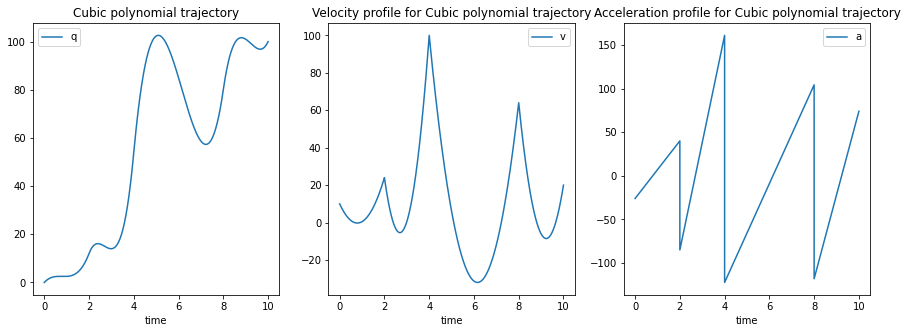

In [66]:
Q,V,A = trajectory(q0=0,
                  v0=10,
                  alpha0=0,
                  qf=100,
                  vf=20,
                  alphaf=10,
                  t0=0,
                  tf=10,
                  swich=0,
                  via=3)

# Example Via points locations
#Enter via points locations in [q, v, t]
#12 24 2
#54 100 4
#80 64 8

Please Enter Inputs as A single point (q, v, t, alpha) 
Please Enter Address 1:
12 24 2 1
Please Enter Address 2:
54 100 4 3
Please Enter Address 3:
80 64 8 7


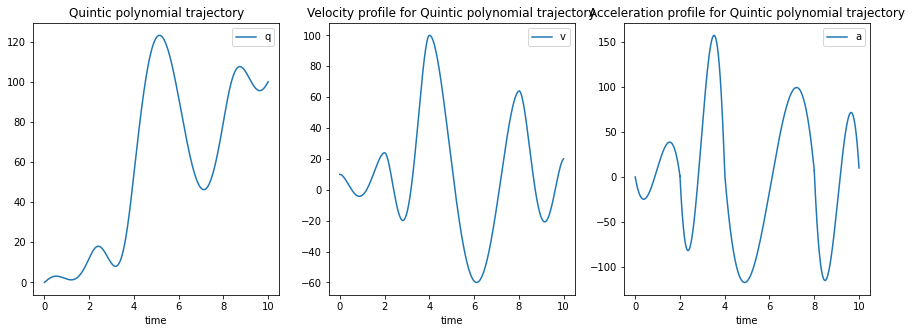

In [67]:
Q,V,A = trajectory(q0=0,
                 v0=10,
                 alpha0=0,
                 qf=100,
                 vf=20,
                 alphaf=10,
                 t0=0,
                 tf=10,
                 swich=1,
                 via=3)
# Example Via points locations
#Enter via points locations in [q, v, t]
# 12 24 2 1 
# 54 100 4 3
# 80 64 8 7